# "[DL] AlexNet"
> "An introduction to AlexNet"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Peiyi Hung
- categories: [category, learning]
- image:

In [ ]:
#!pip install --upgrade fastai

# Introduction

In [1]:
from fastai.vision.all import *

# AlexNet

## Characteristics of AlexNet

* ReLU
* Pooling
* GPU
* dropout
* l2 regularize

## Structure of AlexNet

In [2]:
alexnet = nn.Sequential(
    ### conv1
    nn.Conv2d(3, 96, kernel_size=11, stride=4),              # 55x55
    nn.ReLU(),
    nn.BatchNorm2d(96),
    nn.MaxPool2d(kernel_size=3, stride=2),                   # 27x27
    ### conv2
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  # 27x27
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.MaxPool2d(kernel_size=3, stride=2),                   # 13x13
    ### conv3
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1), # 13x13
    nn.ReLU(),
    ### conv4
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1), # 13x13
    nn.ReLU(),
    ### conv5
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1), # 13x13
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=0),        # 6x6
    ### fully connected
    nn.Flatten(),                                            # 6x6x256=9216
    nn.Linear(9216, 4096),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)                                      # 10 classes
)

In [3]:
sample = torch.randn(3, 227, 227).unsqueeze(0)
sample.shape # NxCxHxW

torch.Size([1, 3, 227, 227])

In [4]:
alexnet(sample).shape 

torch.Size([1, 10])

# Data

In [ ]:
path = untar_data(URLs.IMAGENETTE)

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(),
                   item_tfms=Resize(227),
                   batch_tfms=aug_transforms())
dls = dblock.dataloaders(path, bs=128)

dls.show_batch()

# Train our AlexNet

In [16]:
learn = Learner(dls, alexnet, metrics=accuracy)

SuggestedLRs(lr_min=2.2908675418875645e-07, lr_steep=6.309573450380412e-07)

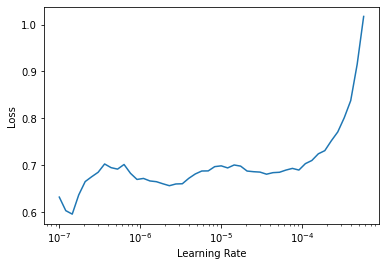

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(20, lr_max=5e-5, wd=0.0005)

epoch,train_loss,valid_loss,accuracy,time
0,0.677220,0.730224,0.774459,01:28
1,0.689051,0.777071,0.763630,01:28
2,0.756147,0.783831,0.756535,01:29
3,0.799501,1.047189,0.699403,01:28
4,0.853927,0.824585,0.753547,01:29
5,0.842448,0.923859,0.722928,01:30
6,0.793850,1.057455,0.701643,01:31
7,0.739824,0.819447,0.752054,01:30
8,0.723428,0.775073,0.768111,01:30
9,0.654886,0.763282,0.779686,01:30


# What if we have images with size other than 227x227?

In [11]:
adapted_alexnet = nn.Sequential(
    ### conv1
    nn.Conv2d(3, 96, kernel_size=11, stride=4),           
    nn.ReLU(),
    nn.BatchNorm2d(96),
    nn.MaxPool2d(kernel_size=3, stride=2),                 
    ### conv2
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.MaxPool2d(kernel_size=3, stride=2),                
    ### conv3
    nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1), 
    nn.ReLU(),
    ### conv4
    nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1), 
    nn.ReLU(),
    ### conv5
    nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=0),       
    ### adaptive average pooling
    nn.AdaptiveAvgPool2d((6,6)),
    ### fully connected
    nn.Flatten(),                                            
    nn.Linear(9216, 4096),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)   
)

In [12]:
sample2 = torch.randn(3, 128, 128).unsqueeze(0)
sample2.shape 

torch.Size([1, 3, 128, 128])

In [13]:
adapted_alexnet(sample2).shape 

torch.Size([1, 10])

# Reference